### Лабораторная работа №3 "Задача аппроксимации на PyTorch"

In [ ]:
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

**1.** Пример с квадратичной функцией

Необхдимые функции

In [ ]:
def loss_func(y,y_pred):
    """Функция потерь"""
    return torch.mean((y - y_pred) ** 2)

In [ ]:
def func_x2(x, theta):
    """Квадратное уравнение"""
    return theta[0] + theta[1] * x + theta[2] * x ** 2

In [ ]:
def plot_rez(x, y, y_pred, feature=1):
    """Вывод результатов"""
    plt.figure(figsize=(6, 3))
    if len(x.shape) > 1:
        x = x[:, feature]
    plt.scatter(x, y, label='y_true', c='g')
    plt.plot(x, y_pred, label='y_pred', c='r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [ ]:
def plot_peds_vs_targets(y, y_pred):
    """Сравнение предсказаний и разметки"""
    plt.figure(figsize=(6, 6))
    plt.scatter(y, y, c='g')
    plt.scatter(y, y_pred, c='r')
    plt.legend(['targets', 'predictions'])
    plt.xlabel('target y')
    plt.ylabel('predicted y')
    plt.show()

In [ ]:
def plot_loss(loss_value):
    """Вывод результатов"""
    plt.figure(figsize=(6, 3))
    plt.plot(loss_value, label = 'y_pred')
    plt.ylabel('loss')
    plt.xlabel('Iteration')
    plt.legend()
    plt.yscale('log')
    plt.show()

In [ ]:
def train_proc(X, theta, y, forward_fcn, lr=0.001, num_iter=10):
    """Процесс обучения"""
    loss_value = []
    
    for itr in range(num_iter):
        theta.grad = None # Обнуление градиента     
        loss = loss_func(y, forward_fcn(X, theta)) # Прямой проход искомой функции и расчет функции потерь
        loss.backward() # Расчет градиентов
        loss_value.append(loss.item())
        theta.data -= lr * theta.grad.data # Выполнение градиентного спуска
    
    return theta.data, loss_value

Инициализация входов, выходов и весов

In [ ]:
x1, xn, n = 2, 7, 20
theta_true = torch.tensor([3, 1, 3])

X = torch.linspace(x1, xn, n)
y = func_x2(X, theta_true) + torch.randn(X.shape[0]) * 2
theta = torch.rand(3,1).requires_grad_()

Инициализация входов, выходов и весов

MSE optimal = 4.32368


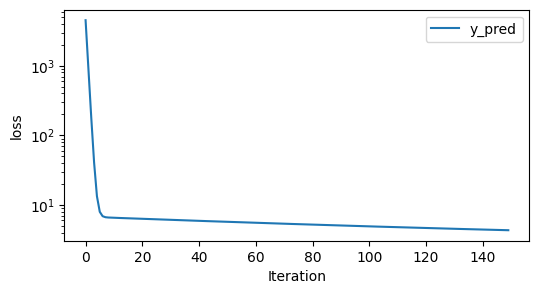

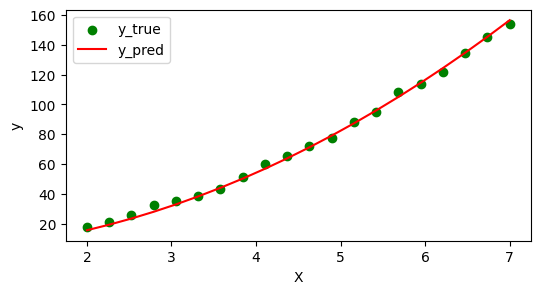

In [ ]:
theta_opt, loss_value = train_proc(X, theta, y, forward_fcn=func_x2, lr=0.001, num_iter=150)
y_pred = func_x2(X, theta_opt)
mse_opt = loss_func(y, y_pred)
print('MSE optimal = %.5f' % mse_opt.item())
plot_loss(loss_value)
plot_rez(X, y, y_pred)
plot_peds_vs_targets(y, y_pred)

**2.** Добавьте нормализацию датасета и разбиение на выборки (train_test_split работает и с тензорами)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


def normalization(X):
    return (X - X.mean()) / X.std()

df = fetch_california_housing(as_frame=True)

X = normalization(df.data.copy())
y = df.target

display(X)
display(y)

X = torch.tensor(X.to_numpy())
y = torch.tensor(y.to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344709  0.982119  0.628544  -0.153754   -0.974405 -0.049595   
1      2.332181 -0.607004  0.327033  -0.263329    0.861418 -0.092510   
2      1.782656  1.856137  1.155592  -0.049015   -0.820757 -0.025842   
3      0.932945  1.856137  0.156962  -0.049832   -0.766010 -0.050328   
4     -0.012881  1.856137  0.344702  -0.032905   -0.759828 -0.085614   
...         ...       ...       ...        ...         ...       ...   
20635 -1.216099 -0.289180 -0.155020   0.077352   -0.512579 -0.049109   
20636 -0.691576 -0.845373  0.276874   0.462353   -0.944382  0.005021   
20637 -1.142566 -0.924829 -0.090316   0.049413   -0.369528 -0.071733   
20638 -1.054557 -0.845373 -0.040210   0.158774   -0.604415 -0.091223   
20639 -0.780111 -1.004285 -0.070441   0.138399   -0.033976 -0.043681   

       Latitude  Longitude  
0      1.052523  -1.327803  
1      1.043159  -1.322812  
2      1.038478  -1.332794  
3      1.038478  -1.337785  
4      1.038478  -1.337785  
...         ...        ...  
20635  1.801603  -0.758808  
20636  1.806285  -0.818702  
20637  1.778194  -0.823693  
20638  1.778194  -0.873605  
20639  1.750104  -0.833676  

[20640 rows x 8 columns]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

**3.** Реализуйте функцию для линейной регрессии вида: $h = theta_1x_1 + theta_2x_2 + ... + theta_nx_n + theta_{n+1}$

In [ ]:
def linear_regression(X, theta):
    return torch.sum(theta[0][:-1] * X, dim=1) + theta[0][-1:]

**4.** Добавьте в процесс обучения разбиение на батчи случайным образом. Необходимо брать нужный срез случайных индексов.

In [ ]:
import random

def train_proc(X, theta, y, forward_fcn, lr=0.001, batch_size=64, num_iter=10):
    """Процесс обучения"""
    loss_value = []
    
    for itr in range(num_iter):
        indices = random.sample(range(X.shape[0]), X.shape[0]) # Массив с индексами в случайном порядке
        for batch in range(len(X) // batch_size):
            X_batch, y_batch = (X[indices[batch:batch + batch_size]],
                                y[indices[batch:batch + batch_size]])
            
            theta.grad = None # Обнуление градиента     
            loss = loss_func(y, forward_fcn(X, theta)) # Прямой проход искомой функции и расчет функции потерь
            loss.backward() # Расчет градиентов
            loss_value.append(loss.item())
            theta.data -= lr * theta.grad.data # Выполнение градиентного спуска
    
    return theta.data, loss_value

MSE optimal = 0.53296


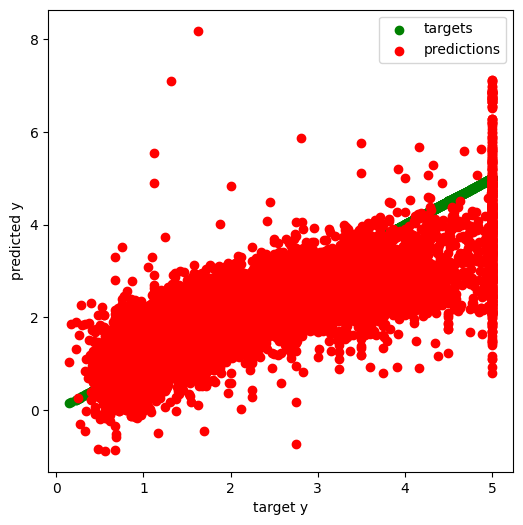

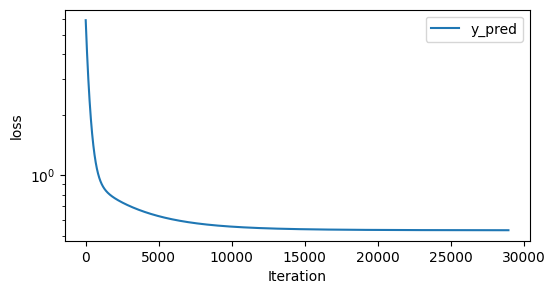

In [ ]:
theta = torch.rand(1, X.shape[1] + 1).requires_grad_()

theta_opt, loss_value = train_proc(X_train, theta, y_train,
                                   forward_fcn=linear_regression, lr=0.001, batch_size=64, num_iter=150)

y_train_pred = linear_regression(X_train, theta_opt)
mse_opt = loss_func(y_train, y_train_pred)
print('MSE optimal = %.5f' % mse_opt.item())

plot_peds_vs_targets(y_train, y_train_pred)
plot_loss(loss_value)

**5.** Реализуйте поиск шага обучения и размера батча по валидации

In [ ]:
lr = [0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
batch_size = [16, 32, 64, 128, 256]

best_mse = None
best_lr = None
best_batch_size = None

for lr_step in lr:
  for batch_step in batch_size:
    theta = torch.rand(1, X.shape[1] + 1).requires_grad_()
    theta_opt, loss_value = train_proc(X_train, theta, y_train,
                                   forward_fcn=linear_regression, lr=lr_step, batch_size=batch_step, num_iter=150)
    y_val_pred = linear_regression(X_val, theta_opt)
    mse = loss_func(y_val, y_val_pred)

    print(f"Learning rate: {lr_step}, batch size: {batch_step}\nVal MSE = {mse}")

    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_lr = lr_step
        best_batch_size = batch_step


print(f"Best parameters:\nLearning rate: {best_lr}, batch size: {best_batch_size} with Val MSE = {best_mse:.5f}")

Learning rate: 5e-05, batch size: 16
Val MSE = 0.5786595171136552
Learning rate: 5e-05, batch size: 32
Val MSE = 0.726741928612802
Learning rate: 5e-05, batch size: 64
Val MSE = 0.7712567611130821
Learning rate: 5e-05, batch size: 128
Val MSE = 0.8595160721152129
Learning rate: 5e-05, batch size: 256
Val MSE = 1.4632421918858458
Learning rate: 0.0001, batch size: 16
Val MSE = 0.5395817301003119
Learning rate: 0.0001, batch size: 32
Val MSE = 0.5907978329676639
Learning rate: 0.0001, batch size: 64
Val MSE = 0.7269812877917627
Learning rate: 0.0001, batch size: 128
Val MSE = 0.7297312034689232
Learning rate: 0.0001, batch size: 256
Val MSE = 0.920037478354774
Learning rate: 0.0005, batch size: 16
Val MSE = 0.5300896030024143
Learning rate: 0.0005, batch size: 32
Val MSE = 0.5300915992567446
Learning rate: 0.0005, batch size: 64
Val MSE = 0.5415869634995197
Learning rate: 0.0005, batch size: 128
Val MSE = 0.5950647761352728
Learning rate: 0.0005, batch size: 256
Val MSE = 0.6830110470351

**6.** Обучите модель с лучшими параметрами. Выполните оценку и визуализацию работы модели.

Train MSE = 0.53264


Val MSE = 0.53013


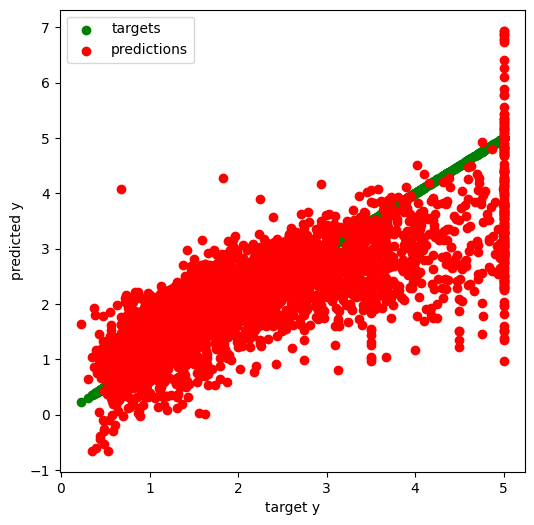

Test MSE = 0.49595


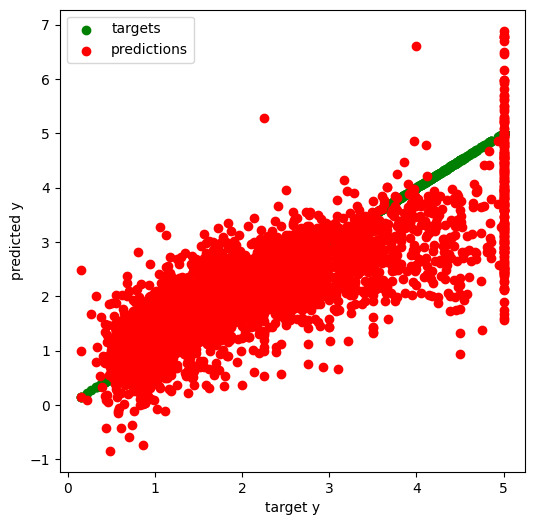

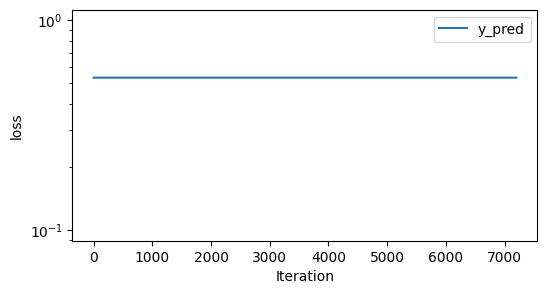

In [ ]:
theta = torch.rand(1, X.shape[1] + 1).requires_grad_()
theta_best, loss_value = train_proc(X_train, theta, y_train,
                                   forward_fcn=linear_regression, lr=best_lr, batch_size=best_batch_size, num_iter=150)

y_train_pred = linear_regression(X_train, theta_best)
train_mse = loss_func(y_train, y_train_pred)
print('Train MSE = %.5f' % train_mse.item())
plot_peds_vs_targets(y_train, y_train_pred)

y_val_pred = linear_regression(X_val, theta_best)
val_mse = loss_func(y_val, y_val_pred)
print('Val MSE = %.5f' % val_mse.item())
plot_peds_vs_targets(y_val, y_val_pred)

y_test_pred = linear_regression(X_test, theta_best)
test_mse = loss_func(y_test, y_test_pred)
print('Test MSE = %.5f' % test_mse.item())
plot_peds_vs_targets(y_test, y_test_pred)

plot_loss(loss_value)